In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./EV survery.csv')

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,Gender,Location,Type of location,Age,Profession,Annual Income,Model,Segment,Environmet,PowerTrain,Price,Choice,Budget,Preformance,Affordability,Style,Luxury,RunningCost
0,0,0,Male,Uttar Pradesh,Major City,20,Student,2.5,SUV,['Preformance'],A lilttle bit,Lack of charging options,1.5,Negligible Running cost,0.0,0,0,0,0,0
1,1,1,Female,Uttar Pradesh,Major City,23,Student,2.5,Sedan,['Affordability'],A lilttle bit,Range in terms of distance,7.5,Negligible Running cost,12.5,0,0,0,0,0
2,2,2,Male,Uttar Pradesh,Major City,20,Student,2.5,SUV,"['Style', 'Performance']",A lilttle bit,Lack of charging options,4.0,Negligible Running cost,17.5,0,0,0,0,0
3,3,3,Female,Delhi,Major City,19,Student,25.0,SUV,['Performance'],It is taken into consideration,Lack of charging options,0.0,I do not prefer an electric car,2.5,0,0,0,0,0
4,4,4,Female,Haryana,Major City,19,Student,2.5,SUV,['Performance'],A lilttle bit,Affordability,0.0,Enviroment Friendly,7.5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,97,Female,Uttar Pradesh,Major City,20,Student,2.5,Sports,"['Luxury', 'Performance', 'Affordability']",It is taken into consideration,Lack of design options,0.0,I do not prefer an electric car,17.5,0,0,0,0,0
98,98,98,Female,Delhi,Major City,21,Student,2.5,MPV (Multi purpose vehicle),"['Performance', 'Affordability']",It is taken into consideration,Lack of charging options,1.5,Enviroment Friendly,7.5,0,0,0,0,0
99,99,99,Male,Uttar Pradesh,Major City,19,Student,2.5,Hatch back,"['Performance', 'Affordability', 'RunningCost']",A lilttle bit,Affordability,1.5,Negligible Running cost,12.5,0,0,0,0,0
100,100,100,Male,Delhi,Major City,48,Working professional,25.0,SUV,['Style'],A lilttle bit,Range in terms of distance,1.5,Negligible Running cost,12.5,0,0,0,0,0


In [5]:
np.sort(data['Location'].unique())

array(['Bihar', 'Delhi', 'Ghaziabad ', 'Greater Noida west', 'Haryana',
       'Hyderabad ', 'Karnataka', 'MP', 'Maharashtra', 'Noida', 'Odisha ',
       'Tamil Nadu', 'Telangana', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [6]:
data['Location']=data['Location'].replace(['Delhi ', 'Delhi-NCR','New Delhi','New Delhi ',],'Delhi')
data['Location']=data['Location'].replace('Haryana ','Haryana')
data['Location']=data['Location'].replace(['Karnataka ','karnataka'],'Karnataka')
data['Location']=data['Location'].replace(['Maharashtra ', 'Maharastra '],'Maharashtra')
data['Location']=data['Location'].replace(['Tamil Nadu', 'Tamil Nadu ','tamilnadu', 'Tamil nadu', 'Tamil nadu ','TamilNadu', 'Tamilnadu'],'Tamil Nadu')
data['Location']=data['Location'].replace(['U.P.', 'UP', 'UP ', 'Uttar Pradesh','Uttar Pradesh ', 'Uttar Pradesh (Delhi NCR)', 'Uttar pradesh','Uttar pradesh ', 'Uttarpradesh '],'Uttar Pradesh')

In [7]:
def replace(x):
    x=x.replace(" ","")
    x=x.replace("[","")
    x=x.replace("]","")
    x=x.replace("'","")
    return(x)

In [8]:
data['Segment']=data['Segment'].apply(replace)

In [9]:
data['Segment'].unique()

array(['Preformance', 'Affordability', 'Style,Performance', 'Performance',
       'Luxury,Performance,RunningCost',
       'Luxury,Performance,Affordability,RunningCost',
       'Style,Performance,Affordability,RunningCost',
       'Style,Luxury,Performance,Affordability,RunningCost',
       'Performance,RunningCost', 'Style,Performance,Affordability',
       'Style,Affordability,RunningCost', 'RunningCost',
       'Performance,Affordability,RunningCost',
       'Luxury,Performance,Affordability', 'Luxury',
       'Performance,Affordability', 'Luxury,Performance',
       'Style,Affordability', 'Style',
       'Style,Luxury,Performance,Affordability',
       'Style,Performance,RunningCost', 'Style,Luxury,Performance',
       'Affordability,RunningCost'], dtype=object)

In [10]:
data['Performance']=0
data['Affordability']=0
data['Style']=0
data['Luxury']=0
data['RunningCost']=0

In [11]:
for i in range(len(data)):
    for j in data.iloc[i]['Segment'].split(","):
        data.loc[i,j]=1

In [12]:
data = data.drop(['Segment','Unnamed: 0','Unnamed: 0.1'],axis=1)

In [13]:
data['PowerTrain'].unique()

array(['Lack of charging options', 'Range in terms of distance',
       'Affordability', 'Lack of design options',
       'I dont have any concerns', "EVs don't produce sound ",
       'Performance',
       "It doesn't make sound while moving. It may cause accidents",
       'I dont like how soundless they they dont have a natural strong feeling to it ',
       'The initial carbon footprint that it generates'], dtype=object)

In [14]:
data['PowerTrain']=data['PowerTrain'].replace(["It doesn't make sound while moving. It may cause accidents",
       'I dont like how soundless they they dont have a natural strong feeling to it '],"EVs don't produce sound ")

In [15]:
data['PowerTrain'].unique()

array(['Lack of charging options', 'Range in terms of distance',
       'Affordability', 'Lack of design options',
       'I dont have any concerns', "EVs don't produce sound ",
       'Performance', 'The initial carbon footprint that it generates'],
      dtype=object)

In [16]:
data['Choice'].unique()

array(['Negligible Running cost', 'I do not prefer an electric car',
       'Enviroment Friendly',
       'Overall better performance than many gas cars.'], dtype=object)

In [17]:
data = data.drop('Preformance',axis=1)

In [18]:
data_bool = pd.get_dummies(data)

In [19]:
data_bool

,Age,Annual Income,Price,Budget,Affordability,Style,Luxury,RunningCost,Performance,Gender_Female,...,PowerTrain_I dont have any concerns,PowerTrain_Lack of charging options,PowerTrain_Lack of design options,PowerTrain_Performance,PowerTrain_Range in terms of distance,PowerTrain_The initial carbon footprint that it generates,Choice_Enviroment Friendly,Choice_I do not prefer an electric car,Choice_Negligible Running cost,Choice_Overall better performance than many gas cars.
0,20,2.5,1.5,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,23,2.5,7.5,12.5,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,20,2.5,4.0,17.5,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,19,25.0,0.0,2.5,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
4,19,2.5,0.0,7.5,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,2.5,0.0,17.5,1,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
98,21,2.5,1.5,7.5,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
99,19,2.5,1.5,12.5,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
100,48,25.0,1.5,12.5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
data_bool

,Age,Annual Income,Price,Budget,Affordability,Style,Luxury,RunningCost,Performance,Gender_Female,...,PowerTrain_I dont have any concerns,PowerTrain_Lack of charging options,PowerTrain_Lack of design options,PowerTrain_Performance,PowerTrain_Range in terms of distance,PowerTrain_The initial carbon footprint that it generates,Choice_Enviroment Friendly,Choice_I do not prefer an electric car,Choice_Negligible Running cost,Choice_Overall better performance than many gas cars.
0,20,2.5,1.5,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,23,2.5,7.5,12.5,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,20,2.5,4.0,17.5,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,19,25.0,0.0,2.5,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
4,19,2.5,0.0,7.5,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,2.5,0.0,17.5,1,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
98,21,2.5,1.5,7.5,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
99,19,2.5,1.5,12.5,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
100,48,25.0,1.5,12.5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
from sklearn.decomposition import PCA

In [22]:
pd.options.display.float_format = '{:.6f}'.format
pca = PCA(n_components=11)
pca.fit(data_bool)
pca_data = pca.transform(data_bool)
df = pd.DataFrame(pca_data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000
std,12.383290,10.327270,7.604756,2.685732,0.823464,0.744394,0.663950,0.611185,0.571523,0.555494,0.506478
min,-11.287303,-26.753094,-15.916679,-5.220697,-1.413240,-1.342763,-1.345544,-1.279440,-1.118387,-1.208980,-1.226306
25%,-6.974615,-5.140519,-4.291863,-1.506475,-0.742444,-0.567017,-0.586820,-0.472590,-0.407572,-0.355225,-0.321215
50%,-4.806614,-1.558004,-1.289691,-0.569868,0.018963,-0.113083,0.048523,-0.049988,0.025252,-0.099598,-0.005402
75%,4.942991,3.032905,2.111780,1.107539,0.652133,0.501441,0.572888,0.359324,0.318448,0.371922,0.353702
max,59.934994,34.574299,29.908565,9.409241,1.858973,1.732715,1.421008,1.539404,1.670133,1.786069,1.407558


In [23]:
loadings = pd.DataFrame(pca.components_.T, columns=df.columns, index=data_bool.columns)
loadings

,0,1,2,3,4,5,6,7,8,9,10
Age,0.060584,-0.486733,0.869034,-0.037447,-0.000255,0.000954,0.000631,0.001658,-0.022338,-0.021331,-0.008420
Annual Income,0.933701,-0.279529,-0.220279,0.032980,0.007900,0.003038,0.000323,-0.006676,0.003813,-0.003217,-0.006087
Price,0.018436,0.101855,0.096744,0.986101,0.025769,-0.009945,0.013675,0.009233,-0.012332,-0.021537,0.018909
Budget,0.351808,0.820673,0.429373,-0.132554,-0.009930,0.000155,0.005122,-0.001928,-0.004768,-0.001983,-0.006044
Affordability,-0.004894,-0.002768,-0.001855,0.009136,0.191576,-0.215868,0.290018,-0.228057,0.176004,-0.352476,0.085651
Style,0.002141,0.004334,-0.006091,-0.028854,0.321811,-0.088487,0.008603,-0.030937,0.110865,-0.378377,0.016383
Luxury,0.001432,0.010919,0.007536,-0.004173,0.275317,-0.176586,0.014648,-0.034999,0.308968,0.118596,0.191440
RunningCost,-0.004353,-0.000878,0.003917,-0.029056,0.255497,-0.204737,0.224123,-0.129296,0.252290,-0.157948,0.055685
Performance,-0.005064,0.003916,-0.007055,0.007738,0.137112,-0.106813,0.081142,-0.144844,0.115932,0.006807,-0.281584
Gender_Female,0.002782,-0.003295,-0.011097,0.005141,-0.492772,-0.100277,0.288387,0.117965,0.061490,-0.205544,-0.008012


Text(0, 0.5, 'PC2')

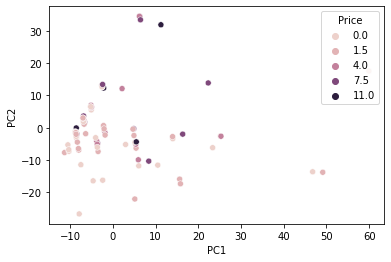

In [24]:
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=data['Price'])
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

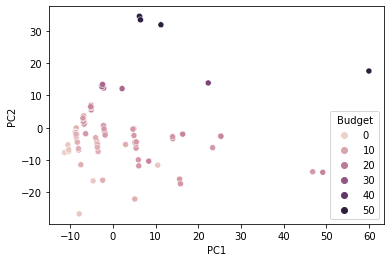

In [25]:
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=data['Budget'])
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

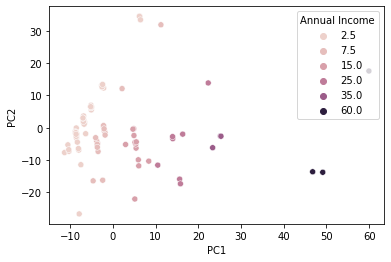

In [26]:
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=data['Annual Income'])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data_bool)

In [28]:
import warnings
warnings.filterwarnings('ignore')
X=data_bool
ssd = []
from sklearn.cluster import KMeans
for k in range(2,10):
    model = KMeans(n_clusters=k,n_init=10)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

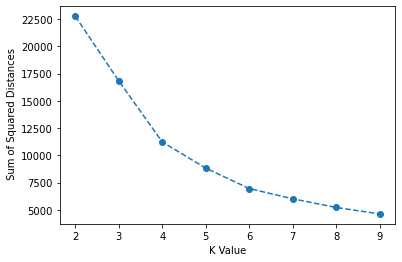

In [29]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [30]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

Text(0, 0.5, 'Silhouette Score')

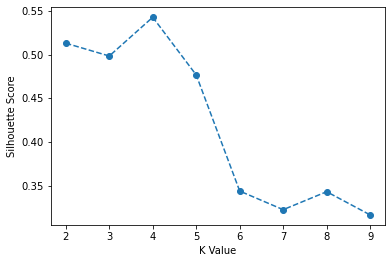

In [31]:
plt.plot(range(2,10),silhouette_coefficients,'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")

In [32]:
from sklearn.datasets import make_moons
features, true_labels = make_moons(n_samples=len(data_bool), noise=0.05)

In [33]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
ari = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = adjusted_rand_score(true_labels, kmeans.labels_)
    ari.append(score)

Text(0, 0.5, 'Adjusted Random Index Score')

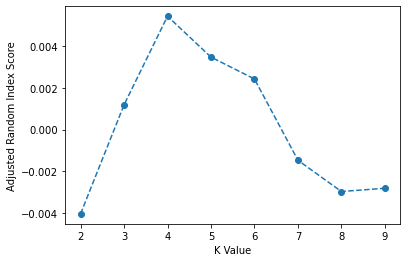

In [34]:
plt.plot(range(2,10),ari,'o--')
plt.xlabel("K Value")
plt.ylabel("Adjusted Random Index Score")

In [35]:
final_kmeans = KMeans(n_clusters=7)
final_kmeans.fit(X)

KMeans(n_clusters=7)

In [36]:
data_bool["Cluster"]=final_kmeans.labels_

Text(0, 0.5, 'PC2')

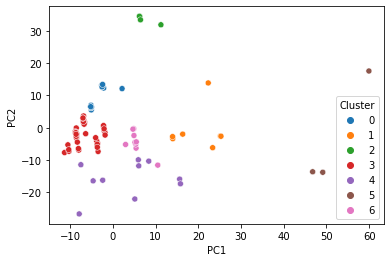

In [37]:
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=data_bool['Cluster'],palette='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [38]:
data_bool

,Age,Annual Income,Price,Budget,Affordability,Style,Luxury,RunningCost,Performance,Gender_Female,...,PowerTrain_Lack of charging options,PowerTrain_Lack of design options,PowerTrain_Performance,PowerTrain_Range in terms of distance,PowerTrain_The initial carbon footprint that it generates,Choice_Enviroment Friendly,Choice_I do not prefer an electric car,Choice_Negligible Running cost,Choice_Overall better performance than many gas cars.,Cluster
0,20,2.500000,1.500000,0.000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,3
1,23,2.500000,7.500000,12.500000,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,3
2,20,2.500000,4.000000,17.500000,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,19,25.000000,0.000000,2.500000,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,6
4,19,2.500000,0.000000,7.500000,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,2.500000,0.000000,17.500000,1,0,1,0,1,1,...,0,1,0,0,0,0,1,0,0,0
98,21,2.500000,1.500000,7.500000,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,3
99,19,2.500000,1.500000,12.500000,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,3
100,48,25.000000,1.500000,12.500000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,4


In [39]:
segement_profile = data_bool.groupby("Cluster").aggregate('mean')

In [40]:
segement_profile

,Age,Annual Income,Price,Budget,Affordability,Style,Luxury,RunningCost,Performance,Gender_Female,...,PowerTrain_I dont have any concerns,PowerTrain_Lack of charging options,PowerTrain_Lack of design options,PowerTrain_Performance,PowerTrain_Range in terms of distance,PowerTrain_The initial carbon footprint that it generates,Choice_Enviroment Friendly,Choice_I do not prefer an electric car,Choice_Negligible Running cost,Choice_Overall better performance than many gas cars.
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,0.500000,0.444444,0.500000,0.388889,0.833333,0.388889,...,0.111111,0.388889,0.055556,0.000000,0.222222,0.055556,0.555556,0.277778,0.166667,0.000000
1,20.857143,29.285714,2.928571,17.857143,0.571429,0.571429,0.142857,0.142857,0.857143,0.714286,...,0.285714,0.428571,0.142857,0.000000,0.000000,0.000000,0.428571,0.285714,0.285714,0.000000
2,20.000000,3.750000,7.500000,50.000000,0.500000,0.500000,0.750000,0.250000,0.750000,0.250000,...,0.000000,0.500000,0.000000,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.250000
3,22.215686,3.774510,1.813725,9.215686,0.647059,0.352941,0.235294,0.470588,0.784314,0.490196,...,0.019608,0.549020,0.019608,0.019608,0.196078,0.000000,0.647059,0.117647,0.235294,0.000000
4,46.700000,13.000000,1.600000,9.500000,0.500000,0.300000,0.300000,0.500000,0.500000,0.300000,...,0.000000,0.400000,0.000000,0.000000,0.300000,0.000000,0.500000,0.100000,0.400000,0.000000
5,22.666667,60.000000,0.500000,26.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000
6,24.111111,16.111111,3.000000,10.833333,0.666667,0.444444,0.444444,0.555556,1.000000,0.666667,...,0.000000,0.666667,0.000000,0.000000,0.222222,0.000000,0.666667,0.333333,0.000000,0.000000


In [41]:
segement_profile.insert(4,'Prefference',['Performance','Performance','Affordability, Luxury','Performance, Running Cost, Affordability','Affordability,Style,Luxury,RunningCost,Performance','Luxury, Performance','Performance'])

In [42]:
segement_profile.columns

Index(['Age', 'Annual Income', 'Price', 'Budget', 'Prefference',
       'Affordability', 'Style', 'Luxury', 'RunningCost', 'Performance',
       'Gender_Female', 'Gender_Male', 'Gender_Prefer not to say',
       'Location_Bihar', 'Location_Delhi', 'Location_Ghaziabad ',
       'Location_Greater Noida west', 'Location_Haryana',
       'Location_Hyderabad ', 'Location_Karnataka', 'Location_MP',
       'Location_Maharashtra', 'Location_Noida', 'Location_Odisha ',
       'Location_Tamil Nadu', 'Location_Telangana', 'Location_Uttar Pradesh',
       'Location_West Bengal', 'Type of location_Major City',
       'Type of location_Minor City', 'Type of location_Town',
       'Type of location_Village', 'Profession_Non working',
       'Profession_Student', 'Profession_Working professional',
       'Model_Hatch back', 'Model_MPV (Multi purpose vehicle)', 'Model_SUV',
       'Model_Sedan', 'Model_Sports', 'Environmet_A lilttle bit',
       'Environmet_It is a major concern',
       'Environmet_It

In [43]:
segement_profile=segement_profile.drop(['Affordability', 'Style', 'Luxury', 'RunningCost', 'Performance'],axis=1)

In [44]:
segement_profile.insert(5,'Gender',['Female','Male,Female','Male','Male','Female','Male','Female'])

In [45]:
segement_profile=segement_profile.drop(['Gender_Female', 'Gender_Male', 'Gender_Prefer not to say'],axis=1)

In [46]:
segement_profile

,Age,Annual Income,Price,Budget,Prefference,Gender,Location_Bihar,Location_Delhi,Location_Ghaziabad,Location_Greater Noida west,...,PowerTrain_I dont have any concerns,PowerTrain_Lack of charging options,PowerTrain_Lack of design options,PowerTrain_Performance,PowerTrain_Range in terms of distance,PowerTrain_The initial carbon footprint that it generates,Choice_Enviroment Friendly,Choice_I do not prefer an electric car,Choice_Negligible Running cost,Choice_Overall better performance than many gas cars.
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,0.000000,0.222222,0.000000,0.000000,...,0.111111,0.388889,0.055556,0.000000,0.222222,0.055556,0.555556,0.277778,0.166667,0.000000
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",0.000000,0.285714,0.000000,0.000000,...,0.285714,0.428571,0.142857,0.000000,0.000000,0.000000,0.428571,0.285714,0.285714,0.000000
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.500000,0.000000,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.250000
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,0.000000,0.098039,0.019608,0.000000,...,0.019608,0.549020,0.019608,0.019608,0.196078,0.000000,0.647059,0.117647,0.235294,0.000000
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,0.100000,0.400000,0.000000,0.100000,...,0.000000,0.400000,0.000000,0.000000,0.300000,0.000000,0.500000,0.100000,0.400000,0.000000
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,0.000000,0.333333,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.000000,0.222222,0.000000,0.666667,0.333333,0.000000,0.000000


In [47]:
len(segement_profile.columns)

49

In [48]:
segement_profile.insert(49,'Choice',['Environment Friendly, No','Environment Friendly','Environment Friendly','Environment Friendly, No running cost','Environment Friendly','Environment Friendly','Environment Friendly'])

In [49]:
segement_profile=segement_profile.drop(['Choice_Enviroment Friendly', 'Choice_I do not prefer an electric car',
       'Choice_Negligible Running cost',
       'Choice_Overall better performance than many gas cars.'],axis=1)

In [50]:
segement_profile

,Age,Annual Income,Price,Budget,Prefference,Gender,Location_Bihar,Location_Delhi,Location_Ghaziabad,Location_Greater Noida west,...,Environmet_None,PowerTrain_Affordability,PowerTrain_EVs don't produce sound,PowerTrain_I dont have any concerns,PowerTrain_Lack of charging options,PowerTrain_Lack of design options,PowerTrain_Performance,PowerTrain_Range in terms of distance,PowerTrain_The initial carbon footprint that it generates,Choice
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,0.000000,0.222222,0.000000,0.000000,...,0.111111,0.055556,0.111111,0.111111,0.388889,0.055556,0.000000,0.222222,0.055556,"Environment Friendly, No"
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",0.000000,0.285714,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.285714,0.428571,0.142857,0.000000,0.000000,0.000000,Environment Friendly
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.000000,0.250000,0.000000,Environment Friendly
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,0.000000,0.098039,0.019608,0.000000,...,0.058824,0.196078,0.000000,0.019608,0.549020,0.019608,0.019608,0.196078,0.000000,"Environment Friendly, No running cost"
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,0.100000,0.400000,0.000000,0.100000,...,0.100000,0.300000,0.000000,0.000000,0.400000,0.000000,0.000000,0.300000,0.000000,Environment Friendly
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,Environment Friendly
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.111111,0.000000,0.000000,0.666667,0.000000,0.000000,0.222222,0.000000,Environment Friendly


In [51]:
segement_profile.insert(45,'Concern',['Lack of Charging options','Lack of Charging options','Lack of design Options, Affordability','Affordability, Lack Of Charging Options, Range','Lack Of Charging Options','Lack Of Charging Options','Lack Of Charging Options'])

In [52]:
segement_profile = segement_profile.drop([ 'PowerTrain_Affordability', 'PowerTrain_EVs don'+"'"+'t produce sound ',
       'PowerTrain_I dont have any concerns',
       'PowerTrain_Lack of charging options',
       'PowerTrain_Lack of design options', 'PowerTrain_Performance',
       'PowerTrain_Range in terms of distance',
       'PowerTrain_The initial carbon footprint that it generates'],axis=1)

In [53]:
segement_profile

,Age,Annual Income,Price,Budget,Prefference,Gender,Location_Bihar,Location_Delhi,Location_Ghaziabad,Location_Greater Noida west,...,Model_MPV (Multi purpose vehicle),Model_SUV,Model_Sedan,Model_Sports,Environmet_A lilttle bit,Environmet_It is a major concern,Environmet_It is taken into consideration,Environmet_None,Concern,Choice
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,0.000000,0.222222,0.000000,0.000000,...,0.111111,0.444444,0.166667,0.277778,0.333333,0.222222,0.333333,0.111111,Lack of Charging options,"Environment Friendly, No"
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",0.000000,0.285714,0.000000,0.000000,...,0.000000,0.285714,0.571429,0.000000,0.571429,0.000000,0.428571,0.000000,Lack of Charging options,Environment Friendly
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,0.000000,0.250000,0.000000,0.000000,...,0.250000,0.250000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,"Lack of design Options, Affordability",Environment Friendly
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,0.000000,0.098039,0.019608,0.000000,...,0.039216,0.392157,0.372549,0.058824,0.274510,0.156863,0.509804,0.058824,"Affordability, Lack Of Charging Options, Range","Environment Friendly, No running cost"
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,0.100000,0.400000,0.000000,0.100000,...,0.000000,0.400000,0.400000,0.000000,0.200000,0.500000,0.200000,0.100000,Lack Of Charging Options,Environment Friendly
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.666667,0.000000,Lack Of Charging Options,Environment Friendly
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.666667,0.333333,0.000000,0.111111,0.444444,0.444444,0.000000,Lack Of Charging Options,Environment Friendly


In [54]:
segement_profile.insert(37,'Env Consideration',['A little bit, Taken into consideration','Taken into consideration','A little bit, Taken into consideration','Major Concern','Taken into consideration','Taken into consideration, Major Concern','Major Concern'])

In [55]:
segement_profile = segement_profile.drop(['Environmet_A lilttle bit',
       'Environmet_It is a major concern',
       'Environmet_It is taken into consideration', 'Environmet_None'],axis=1)

In [56]:
segement_profile

,Age,Annual Income,Price,Budget,Prefference,Gender,Location_Bihar,Location_Delhi,Location_Ghaziabad,Location_Greater Noida west,...,Profession_Student,Profession_Working professional,Model_Hatch back,Model_MPV (Multi purpose vehicle),Model_SUV,Model_Sedan,Model_Sports,Env Consideration,Concern,Choice
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,0.000000,0.222222,0.000000,0.000000,...,0.888889,0.111111,0.000000,0.111111,0.444444,0.166667,0.277778,"A little bit, Taken into consideration",Lack of Charging options,"Environment Friendly, No"
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",0.000000,0.285714,0.000000,0.000000,...,0.857143,0.142857,0.142857,0.000000,0.285714,0.571429,0.000000,Taken into consideration,Lack of Charging options,Environment Friendly
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,0.000000,0.250000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.250000,0.250000,0.500000,0.000000,"A little bit, Taken into consideration","Lack of design Options, Affordability",Environment Friendly
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,0.000000,0.098039,0.019608,0.000000,...,0.784314,0.176471,0.137255,0.039216,0.392157,0.372549,0.058824,Major Concern,"Affordability, Lack Of Charging Options, Range","Environment Friendly, No running cost"
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,0.100000,0.400000,0.000000,0.100000,...,0.100000,0.700000,0.200000,0.000000,0.400000,0.400000,0.000000,Taken into consideration,Lack Of Charging Options,Environment Friendly
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,0.000000,0.333333,0.000000,0.000000,...,0.666667,0.333333,0.000000,0.000000,0.333333,0.333333,0.333333,"Taken into consideration, Major Concern",Lack Of Charging Options,Environment Friendly
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,0.000000,0.111111,0.000000,0.000000,...,0.555556,0.444444,0.000000,0.000000,0.666667,0.333333,0.000000,Major Concern,Lack Of Charging Options,Environment Friendly


In [57]:
segement_profile.insert(33,'Type',['Sedan','SUV','SUV','Sedan','SUV,Sedan,Sports','Sedan','Sedan,SUV'])

In [58]:
segement_profile = segement_profile.drop(['Model_Hatch back', 'Model_MPV (Multi purpose vehicle)', 'Model_SUV',
       'Model_Sedan', 'Model_Sports'],axis=1)

In [59]:
segement_profile

,Age,Annual Income,Price,Budget,Prefference,Gender,Location_Bihar,Location_Delhi,Location_Ghaziabad,Location_Greater Noida west,...,Type of location_Minor City,Type of location_Town,Type of location_Village,Profession_Non working,Profession_Student,Profession_Working professional,Type,Env Consideration,Concern,Choice
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,0.000000,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.888889,0.111111,Sedan,"A little bit, Taken into consideration",Lack of Charging options,"Environment Friendly, No"
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",0.000000,0.285714,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.857143,0.142857,SUV,Taken into consideration,Lack of Charging options,Environment Friendly
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,0.000000,0.250000,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.000000,1.000000,0.000000,SUV,"A little bit, Taken into consideration","Lack of design Options, Affordability",Environment Friendly
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,0.000000,0.098039,0.019608,0.000000,...,0.019608,0.019608,0.058824,0.039216,0.784314,0.176471,Sedan,Major Concern,"Affordability, Lack Of Charging Options, Range","Environment Friendly, No running cost"
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,0.100000,0.400000,0.000000,0.100000,...,0.100000,0.000000,0.000000,0.200000,0.100000,0.700000,"SUV,Sedan,Sports",Taken into consideration,Lack Of Charging Options,Environment Friendly
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,0.000000,0.333333,0.000000,0.000000,...,0.666667,0.000000,0.000000,0.000000,0.666667,0.333333,Sedan,"Taken into consideration, Major Concern",Lack Of Charging Options,Environment Friendly
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,0.000000,0.111111,0.000000,0.000000,...,0.111111,0.111111,0.111111,0.000000,0.555556,0.444444,"Sedan,SUV",Major Concern,Lack Of Charging Options,Environment Friendly


In [60]:
segement_profile.insert(28,'Proffession',['Student','Student','Student','Working','Student','Student','Working'])

In [61]:
segement_profile = segement_profile.drop(['Profession_Non working',
       'Profession_Student', 'Profession_Working professional'],axis=1)

In [62]:
segement_profile

,Age,Annual Income,Price,Budget,Prefference,Gender,Location_Bihar,Location_Delhi,Location_Ghaziabad,Location_Greater Noida west,...,Location_West Bengal,Type of location_Major City,Type of location_Minor City,Type of location_Town,Type of location_Village,Proffession,Type,Env Consideration,Concern,Choice
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,0.000000,0.222222,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,Student,Sedan,"A little bit, Taken into consideration",Lack of Charging options,"Environment Friendly, No"
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",0.000000,0.285714,0.000000,0.000000,...,0.000000,0.857143,0.000000,0.142857,0.000000,Student,SUV,Taken into consideration,Lack of Charging options,Environment Friendly
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.750000,0.250000,0.000000,0.000000,Student,SUV,"A little bit, Taken into consideration","Lack of design Options, Affordability",Environment Friendly
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,0.000000,0.098039,0.019608,0.000000,...,0.019608,0.901961,0.019608,0.019608,0.058824,Working,Sedan,Major Concern,"Affordability, Lack Of Charging Options, Range","Environment Friendly, No running cost"
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,0.100000,0.400000,0.000000,0.100000,...,0.000000,0.900000,0.100000,0.000000,0.000000,Student,"SUV,Sedan,Sports",Taken into consideration,Lack Of Charging Options,Environment Friendly
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.333333,0.666667,0.000000,0.000000,Student,Sedan,"Taken into consideration, Major Concern",Lack Of Charging Options,Environment Friendly
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.666667,0.111111,0.111111,0.111111,Working,"Sedan,SUV",Major Concern,Lack Of Charging Options,Environment Friendly


In [63]:
segement_profile.insert(28,'Locality',['Major City','Major City','Major City','Major City','Minor City','Major City','Major City'])

In [64]:
segement_profile = segement_profile.drop(['Type of location_Major City',
       'Type of location_Minor City', 'Type of location_Town',
       'Type of location_Village'],axis=1)

In [65]:
segement_profile

,Age,Annual Income,Price,Budget,Prefference,Gender,Location_Bihar,Location_Delhi,Location_Ghaziabad,Location_Greater Noida west,...,Location_Tamil Nadu,Location_Telangana,Location_Uttar Pradesh,Location_West Bengal,Proffession,Type,Env Consideration,Locality,Concern,Choice
Cluster,,,,,,,,,,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,0.000000,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,Student,Sedan,"A little bit, Taken into consideration",Major City,Lack of Charging options,"Environment Friendly, No"
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",0.000000,0.285714,0.000000,0.000000,...,0.000000,0.000000,0.571429,0.000000,Student,SUV,Taken into consideration,Major City,Lack of Charging options,Environment Friendly
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,Student,SUV,"A little bit, Taken into consideration",Major City,"Lack of design Options, Affordability",Environment Friendly
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,0.000000,0.098039,0.019608,0.000000,...,0.078431,0.019608,0.490196,0.019608,Working,Sedan,Major Concern,Major City,"Affordability, Lack Of Charging Options, Range","Environment Friendly, No running cost"
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,0.100000,0.400000,0.000000,0.100000,...,0.000000,0.000000,0.300000,0.000000,Student,"SUV,Sedan,Sports",Taken into consideration,Minor City,Lack Of Charging Options,Environment Friendly
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,0.000000,0.333333,0.000000,0.000000,...,0.333333,0.000000,0.333333,0.000000,Student,Sedan,"Taken into consideration, Major Concern",Major City,Lack Of Charging Options,Environment Friendly
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,0.000000,0.111111,0.000000,0.000000,...,0.444444,0.000000,0.222222,0.000000,Working,"Sedan,SUV",Major Concern,Major City,Lack Of Charging Options,Environment Friendly


In [66]:
#We will have to remove the locations as they are too many to pinpoint as of now, It can be deduced later once target segment is decided

In [67]:
segement_profile_without_location = segement_profile.drop(['Location_Bihar', 'Location_Delhi', 'Location_Ghaziabad ',
       'Location_Greater Noida west', 'Location_Haryana',
       'Location_Hyderabad ', 'Location_Karnataka', 'Location_MP',
       'Location_Maharashtra', 'Location_Noida', 'Location_Odisha ',
       'Location_Tamil Nadu', 'Location_Telangana', 'Location_Uttar Pradesh',
       'Location_West Bengal'],axis=1)

In [68]:
segement_profile_without_location

,Age,Annual Income,Price,Budget,Prefference,Gender,Proffession,Type,Env Consideration,Locality,Concern,Choice
Cluster,,,,,,,,,,,,
0,20.388889,2.777778,2.527778,20.416667,Performance,Female,Student,Sedan,"A little bit, Taken into consideration",Major City,Lack of Charging options,"Environment Friendly, No"
1,20.857143,29.285714,2.928571,17.857143,Performance,"Male,Female",Student,SUV,Taken into consideration,Major City,Lack of Charging options,Environment Friendly
2,20.000000,3.750000,7.500000,50.000000,"Affordability, Luxury",Male,Student,SUV,"A little bit, Taken into consideration",Major City,"Lack of design Options, Affordability",Environment Friendly
3,22.215686,3.774510,1.813725,9.215686,"Performance, Running Cost, Affordability",Male,Working,Sedan,Major Concern,Major City,"Affordability, Lack Of Charging Options, Range","Environment Friendly, No running cost"
4,46.700000,13.000000,1.600000,9.500000,"Affordability,Style,Luxury,RunningCost,Perform...",Female,Student,"SUV,Sedan,Sports",Taken into consideration,Minor City,Lack Of Charging Options,Environment Friendly
5,22.666667,60.000000,0.500000,26.666667,"Luxury, Performance",Male,Student,Sedan,"Taken into consideration, Major Concern",Major City,Lack Of Charging Options,Environment Friendly
6,24.111111,16.111111,3.000000,10.833333,Performance,Female,Working,"Sedan,SUV",Major Concern,Major City,Lack Of Charging Options,Environment Friendly
